<a href="https://colab.research.google.com/github/stone90n/study/blob/main/univarstatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
res = np.array(['y','n','y','y','y','n','n','y','y','y'])
df =pd.DataFrame(res, columns = ['res'])
df

,res
0,y
1,n
2,y
3,y
4,y
5,n
6,n
7,y
8,y
9,y


In [ ]:
pd.crosstab(index=df["res"], columns="count")

col_0,count
res,
n,3
y,7


<BarContainer object of 2 artists>

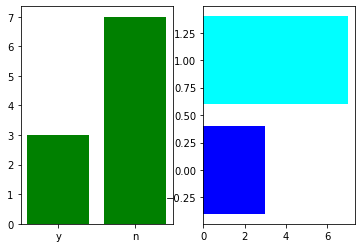

In [ ]:
cr = pd.crosstab(index=df["res"], columns="count")
y_pos = np.arange(len(cr))

plt.subplot(1,2,1)
plt.bar(y_pos, cr['count'],color='g')
plt.xticks(y_pos, res)

plt.subplot(1,2,2)
plt.barh(y_pos, cr['count'],color=['blue','cyan'])

(array([ 1.,  3.,  2.,  4.,  7., 10.,  8.,  9.,  5.,  1.]),
 array([-3.24877888, -2.68159649, -2.1144141 , -1.54723171, -0.98004932,
        -0.41286693,  0.15431546,  0.72149785,  1.28868024,  1.85586263,
         2.42304502]),
 <a list of 10 Patch objects>)

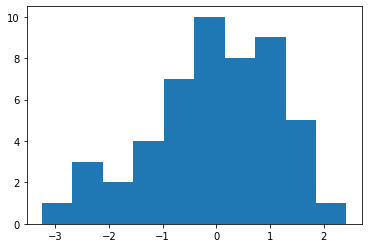

In [ ]:
from scipy.stats import probplot
from scipy import stats
y = stats.norm.rvs(loc = 0, scale = 1, size =50)
plt.hist(y)

In [ ]:
sns.distplot(y)

NameError: name 'sns' is not defined

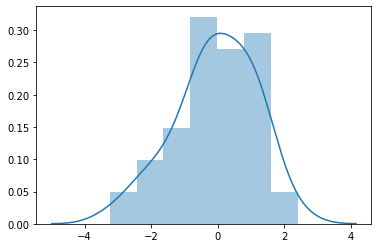

In [ ]:
import seaborn as sns
sns.distplot(y)

In [ ]:
import scipy as sp


In [ ]:
sp.mean(y)

-0.059742146531320636

In [ ]:
stats.describe(y)

DescribeResult(nobs=50, minmax=(-3.248778880203935, 2.423045015957545), mean=-0.059742146531320636, variance=1.5076433484620992, skewness=-0.46838533795486187, kurtosis=-0.16619989780728694)

In [ ]:
stats.mean(y)

AttributeError: module 'scipy.stats' has no attribute 'mean'

In [ ]:
belt = pd.DataFrame({
    'parent' : ['yes','no','yes','no'],
    'child' : ['yes','yes','no','no'],
    'y' : [54,3,7,12]
})
belt

,parent,child,y
0,yes,yes,54
1,no,yes,3
2,yes,no,7
3,no,no,12


In [ ]:
cross = pd.pivot_table(
    data = belt,
    values ='y',
    aggfunc ="sum",
    index = "parent",
    columns = "child",
    margins = True
)
cross

child,no,yes,All
parent,,,
no,12,3,15
yes,7,54,61
All,19,57,76


In [ ]:
sp.stats.chi2_contingency(cross, correction =True)

(30.150819672131146, 4.560314027990396e-06, 4, array([[ 3.75, 11.25, 15.  ],
        [15.25, 45.75, 61.  ],
        [19.  , 57.  , 76.  ]]))

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.groupby(['species'])['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [ ]:
x1 = iris.loc[iris['species'] =="setosa"]['sepal_length']
x2 = iris.loc[iris['species'] =="versicolor"]['sepal_length']
x2

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length, dtype: float64

In [ ]:
stats.ttest_1samp(x1,5.1)

Ttest_1sampResult(statistic=-1.8856732506697453, pvalue=0.06527445885090742)

In [ ]:
mean_x1 = sp.mean(x1)
n = len(x1)
s= sp.sqrt(sp.var(x1, ddof =1)/n)
[mean_x1,n,s]
stats.t.interval(alpha =0.95, df = n-1, loc= mean_x1, scale =s)

(4.905823539430868, 5.106176460569131)

In [ ]:
stats.ttest_ind(x1,x2, equal_var = True)

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487077e-18)

In [ ]:
F = sp.var(x1, ddof = 1)/sp.var(x2, ddof=1)
df1 = len(x1) -1
df2 = len(x2) -1
alpha =0.05
p_value = 2 * (1 - sp.stats.f.cdf(F, df1,df2))
p_value

1.9913428116373002

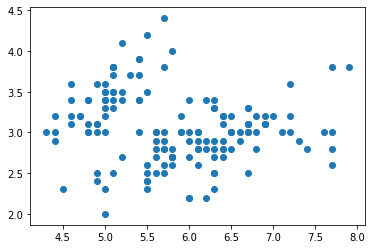

In [ ]:
plt.scatter(iris['sepal_length'],iris['sepal_width'])

In [ ]:
import statsmodels.formula.api as smf
df =pd.DataFrame()
df['x'] = iris['sepal_length']
df['y'] = iris['sepal_width']
lm_ex = smf.ols("y~x", df).fit()
lm_ex.params


Intercept    3.418947
x           -0.061885
dtype: float64

In [ ]:
lm_ex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Sat, 07 Aug 2021   Prob (F-statistic):              0.152
Time:                        18:36:25   Log-Likelihood:                -86.732
No. Observations:                 150   AIC:                             177.5
Df Residuals:                     148   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4189      0.254     13.484      0.000       2.918       3.920
x             -0.0619      0.043     -1.440      0.152      -0.147       0.023
==============================================================================
Omnibus:                        2.474   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.994
Skew:                           0.243   Prob(JB):                        0.369
Kurtosis:                       3.288   Cond. No.                         43.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
sm.stats.anova_lm(lm_ex).round(4)

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,0.3913,0.3913,2.0744,0.1519
Residual,148.0,27.9157,0.1886,NaN,NaN


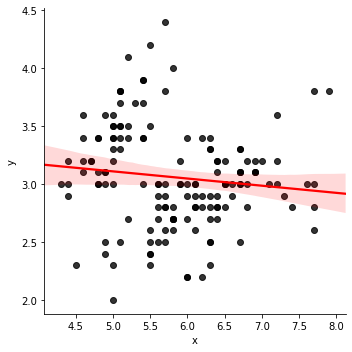

In [ ]:
sns.lmplot(x='x',y='y',data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'})

In [ ]:
from sklearn.linear_model import LinearRegression

df.head()

,x,y
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


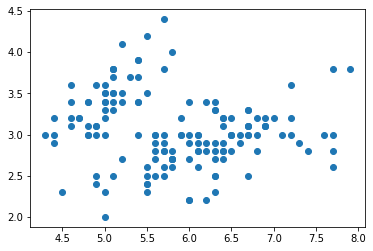

In [ ]:
X = df['x'];Y=df['y']
plt.plot(X,Y,'o')
plt.show()

In [ ]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1),Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predicted = line_fitter.predict(X.values.reshape(-1,1))
y_predicted

array([3.10333437, 3.11571133, 3.12808829, 3.13427677, 3.10952285,
       3.08476893, 3.13427677, 3.10952285, 3.14665373, 3.11571133,
       3.08476893, 3.12189981, 3.12189981, 3.1528422 , 3.06001501,
       3.06620349, 3.08476893, 3.10333437, 3.06620349, 3.10333437,
       3.08476893, 3.10333437, 3.13427677, 3.10333437, 3.12189981,
       3.10952285, 3.10952285, 3.09714589, 3.09714589, 3.12808829,
       3.12189981, 3.08476893, 3.09714589, 3.07858045, 3.11571133,
       3.10952285, 3.07858045, 3.11571133, 3.14665373, 3.10333437,
       3.10952285, 3.14046525, 3.14665373, 3.10952285, 3.10333437,
       3.12189981, 3.10333437, 3.13427677, 3.09095741, 3.10952285,
       2.98575325, 3.02288413, 2.99194173, 3.07858045, 3.01669565,
       3.06620349, 3.02907261, 3.11571133, 3.01050717, 3.09714589,
       3.10952285, 3.05382653, 3.04763805, 3.04144957, 3.07239197,
       3.00431869, 3.07239197, 3.06001501, 3.03526109, 3.07239197,
       3.05382653, 3.04144957, 3.02907261, 3.04144957, 3.02288

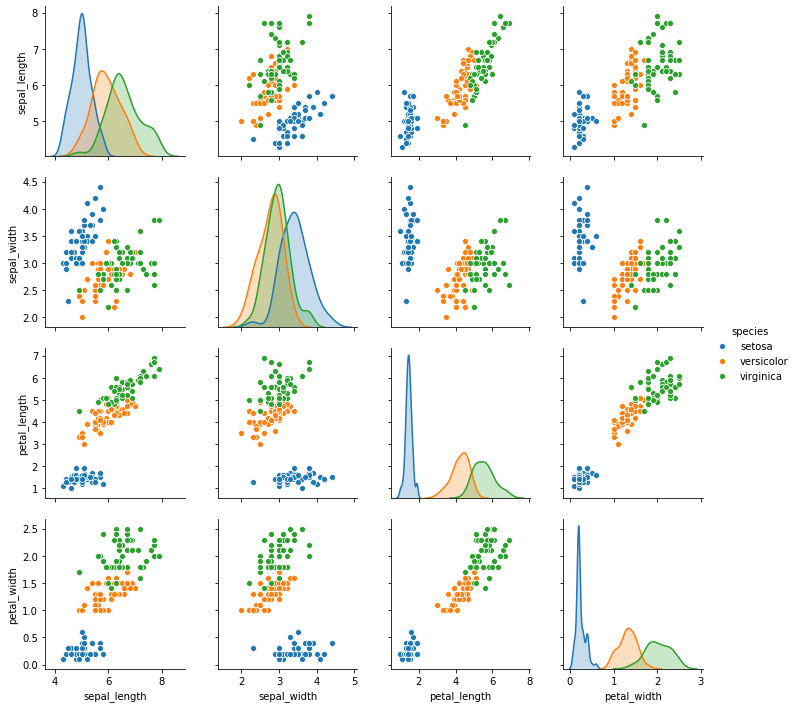

In [ ]:
sns.pairplot(iris, hue = "species")

In [ ]:
aov_model = smf.ols("sepal_length~species", data=iris).fit()
aov_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           1.67e-31
Time:                        19:24:13   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.0060      0.073     68.762      0.000       4.862       5.150
species[T.versicolor]     0.9300      0.103      9.033      0.000       0.727       1.133
species[T.virginica]      1.5820      0.103     15.366      0.000       1.379       1.785
==============================================================================
Omnibus:                        1.188   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.785
Skew:                           0.119   Prob(JB):                        0.675
Kurtosis:                       3.263   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(sm.stats.anova_lm(aov_model))
print(aov_model.params)

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN
Intercept                5.006
species[T.versicolor]    0.930
species[T.virginica]     1.582
dtype: float64


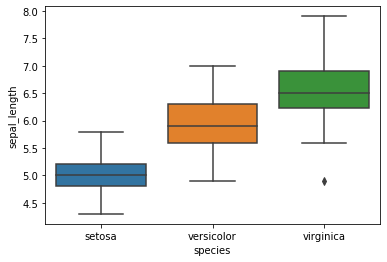

In [ ]:
sns.boxplot(x="species",y="sepal_length", data= iris)